#### [PREVIOUS](4.SQL_course_specification.ipynb) | [HOME](../README.md) | [NEXT](6.model_test_and_validate.ipynb)

---

### CSV Course Specifications

This Jupyter Notebook is a demonstration of the course specifications linear regression algorithm where the final model is exported. The exported model can be used in a stand alone Python implementation without the dependencies.

This can also be viewed as a Python script in [exporter.py](\py_scripts\exporter.py.) and [5.test_import.py](\py_scripts\5.test_import.py).

#### Step 1

Load the required dependencies including [pickle](https://docs.python.org/3/library/pickle.html) the native Python library for serialising data objects:

> [!Caution]
> The pickle module is not secure. Only unpickle data you trust.

In [10]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.linear_model import LinearRegression
import pickle

import os
#Create a folder for the output files
if not os.path.exists("output"):
    os.makedirs("output")


####  Step 2
- Open and parse the CSV file and store the data as variable array objects.

In [11]:
training_data = pd.read_csv('data/3.course_specifications_data.csv', delimiter=',')
x = np.array(training_data.iloc[:,1]).reshape(-1, 1)
y = np.array(training_data.iloc[:,0])

#### Optional Step

Apply your Python skills and query the data set about how many training examples there are and inspect a sample of the data.

In [12]:
m = len(x)
print(f"Number of training examples is: {m}")
table = pd.DataFrame({
    training_data.columns[0]: x.flatten(),  # Flatten x for easy display
    training_data.columns[1]: y
})
print(table.head())

Number of training examples is: 8
   Feature  Target
0        2       1
1        4       3
2        6       5
3        8       7
4       10       9


#### Optional Step

Plot the feature `x` and target `y` data on a graph using the column headings as the graph labels.

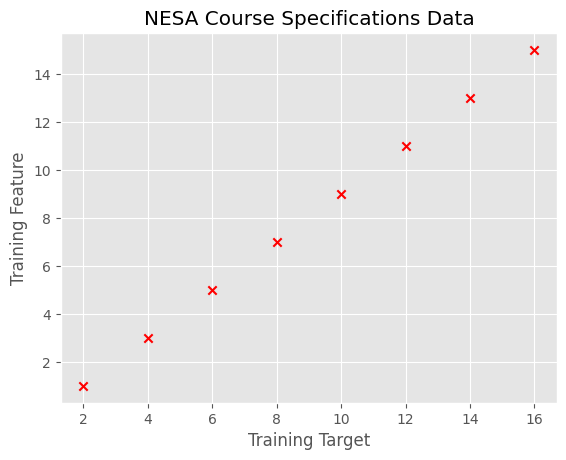

In [13]:
# Plot the data points
plt.scatter(x, y, marker='x', c='r')
# Set the title
plt.title("NESA Course Specifications Data")
# Set the y-axis label
plt.ylabel(f'Training {training_data.columns[0]}')
# Set the x-axis label
plt.xlabel(f'Training {training_data.columns[1]}')
plt.show()

#### Step 3

Use the [sklearn](https://scikit-learn.org/stable/) library to fit the model to the training data which will provide a line of best fit with the lowest cost based on a [sklearn](https://scikit-learn.org/stable/) algorithm.

In [14]:
# Create the model
my_model = LinearRegression()
# Fit the model to the data
my_model.fit(x, y)

LinearRegression()

#### Step 4

Save the model to file.

In [15]:
# save the model to disk
filename = 'output/my_saved_model.sav'
pickle.dump(my_model, open(filename, 'wb'))

#### Step 5
In a separate Python implementation import the file and make a prediction.

In [16]:
loaded_model = pickle.load(open('output\my_saved_model.sav', 'rb'))
predict = np.array([4]).reshape(1, -1)
result = loaded_model.predict(predict)
print(result[0])

2.9999999999999982


#### Optional Step

Plot the features, targets and model (linear regression).

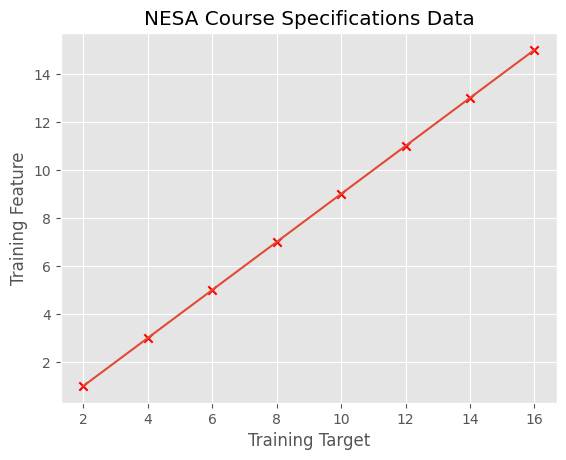

In [17]:
y_pred = my_model.predict(x)
plt.plot(x, y_pred)
plt.scatter(x, y, marker='x', c='r')
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Training {training_data.columns[0]}')
plt.xlabel(f'Training {training_data.columns[1]}')
plt.show()

#### Optional Step

Use the model for predictions and plot them on the visualisation that is saved as file `graph.png` for use in a Python Flask UI API endpoint.

In [18]:
predict = np.array([4]).reshape(1, -1)
y_prediction = my_model.predict(predict)

y_pred = my_model.predict(x)
plt.plot(x, y_pred)
plt.scatter(x, y, marker='x', c='r')
plt.scatter(predict, y_prediction, marker='D', c='r', zorder=10, s=100)
plt.text(y_prediction, predict, f"Target {y_prediction[0]} is prediction from {predict[0,0]} input")
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Training {training_data.columns[0]}')
plt.xlabel(f'Training {training_data.columns[1]}')
plt.savefig('output/graph.png')   # save the figure to file
plt.close()    # close the figure window
